In [182]:
import warnings
warnings.filterwarnings('ignore')

#### Evaluar metricas de desempeño de los modelos

In [183]:
import pandas as pd
from joblib import load
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef, confusion_matrix

In [184]:
def predict_class(scaler_instance, model, val_data, test_data):
    val_data_scaler = scaler_instance.transform(val_data.values)
    test_data_scaler = scaler_instance.transform(test_data.values)
    predict_val = model.predict(X=val_data_scaler)
    predict_test = model.predict(X=test_data_scaler)

    return predict_val, predict_test

In [185]:
def metrics_model(predict_val, y_val, dataset, scaler, model):
    acc_value = accuracy_score(y_pred=predict_val, y_true=y_val) 
    recall_value = recall_score(y_pred=predict_val, y_true=y_val, average='weighted')
    precision_value = precision_score(y_pred=predict_val, y_true=y_val, average='weighted') 
    f1_value = f1_score(y_pred=predict_val, y_true=y_val, average='weighted')
    mcc_value = matthews_corrcoef(y_pred=predict_val, y_true=y_val)
    cm = confusion_matrix(y_pred=predict_val, y_true=y_val)

    df_metrics = pd.DataFrame([[dataset, scaler, model, acc_value, recall_value, precision_value, f1_value, mcc_value, cm]],
                              columns=["dataset", "scaler", "model", "acc", "recall", "precision", "f1", "mcc", "cm"])

    return df_metrics

##### Cargar escaladores

In [186]:
scalers = {
    "StandardScaler": load("results/scaler_standard.joblib"),
    "MinMaxScaler": load("results/scaler_min_max.joblib"),
    "RobustScaler": load("results/scaler_robust.joblib")
}

##### Cargar modelos entrenados

In [187]:
models = {
    "RL": load("results/regression_model.joblib"),
    "KNN": load("results/knn_model.joblib"),
    "RF": load("results/rf_model.joblib"),
    "SVM": load("results/svm_model.joblib"),
    "DT": load("results/dt_model.joblib"),
    "AdaBoost": load("results/ada_model.joblib")
}

##### Leer datos y respuestas de validación y testeo

In [188]:
val_data = pd.read_csv("process_dataset/val_data.csv")
test_data = pd.read_csv("process_dataset/test_data.csv")

y_val = np.load("process_dataset/y_val.npy")
y_test = np.load("process_dataset/y_test.npy")

##### Aplicar metricas a los modelos con diferentes escaladores

In [189]:
results = []

for scaler_name, scaler_instance in scalers.items():
    for model_name, model in models.items():
        predict_val, predict_test = predict_class(scaler_instance, model, val_data, test_data)
        results.append(metrics_model(predict_val, y_val, "Validation", scaler_name, model_name))
        results.append(metrics_model(predict_test, y_test, "Test", scaler_name, model_name))

In [190]:
df_result = pd.concat(results)
df_result = df_result.reset_index(drop=True)

In [191]:
df_result

,dataset,scaler,model,acc,recall,precision,f1,mcc,cm
0,Validation,StandardScaler,RL,0.652091,0.652091,0.425223,0.514769,0.000000,"[[1029, 0], [549, 0]]"
1,Test,StandardScaler,RL,0.638540,0.638540,0.407734,0.497679,0.000000,"[[560, 0], [317, 0]]"
2,Validation,StandardScaler,KNN,0.576679,0.576679,0.541256,0.552201,-0.010619,"[[785, 244], [424, 125]]"
3,Test,StandardScaler,KNN,0.565564,0.565564,0.535881,0.544878,-0.005262,"[[416, 144], [237, 80]]"
4,Validation,StandardScaler,RF,0.642586,0.642586,0.523706,0.521012,-0.019666,"[[1004, 25], [539, 10]]"
5,Test,StandardScaler,RF,0.630559,0.630559,0.527780,0.507405,-0.009170,"[[546, 14], [310, 7]]"
6,Validation,StandardScaler,SVM,0.652091,0.652091,0.425223,0.514769,0.000000,"[[1029, 0], [549, 0]]"
7,Test,StandardScaler,SVM,0.639681,0.639681,0.769659,0.500299,0.044907,"[[560, 0], [316, 1]]"
8,Validation,StandardScaler,DT,0.534221,0.534221,0.542182,0.537870,-0.008981,"[[641, 388], [347, 202]]"
9,Test,StandardScaler,DT,0.533637,0.533637,0.541494,0.537160,0.006719,"[[343, 217], [192, 125]]"


##### Analizar resultados de las metricas

In [192]:
metrics = ['acc', 'recall', 'precision', 'f1', 'mcc']
df_test = df_result[df_result['dataset'] == 'Test']
df_val = df_result[df_result['dataset'] == 'Validation']

In [193]:
def graph_models(df, dataset):
    plt.figure(figsize=(14, 8))
    sns.barplot(x='model', y='value', hue='variable', 
                data=pd.melt(df, id_vars=['model', 'scaler', 'dataset'], value_vars=metrics), 
                ci=None)
    plt.title(f'Comparación de métricas por modelo en {dataset}')
    plt.xlabel('Modelo')
    plt.ylabel('Valor de métrica')
    plt.legend(title='Métricas')
    plt.xticks(rotation=45)
    plt.show()

In [194]:
def graph_scaler(df, dataset):
    plt.figure(figsize=(14, 8))
    sns.barplot(x='scaler', y='value', hue='variable', 
                data=pd.melt(df, id_vars=['scaler', 'model', 'dataset'], value_vars=metrics), 
                ci=None)
    plt.title(f'Comparación de métricas por escalador en {dataset}')
    plt.xlabel('Escalador')
    plt.ylabel('Valor de métricas')
    plt.legend(title='Métricas')
    plt.xticks(rotation=45)
    plt.show()

In [195]:
def graph_models_scaler(df, dataset):
    melted_df = pd.melt(df, id_vars=['model', 'scaler', 'dataset'], value_vars=metrics, var_name='metric', value_name='value')
    average_df = melted_df.groupby(['model', 'scaler', 'metric'], as_index=False).agg({'value': 'mean'})
    plt.figure(figsize=(16, 8))
    sns.barplot(x='model', y='value', hue='scaler', 
                data=average_df, 
                ci=None)
    plt.title(f'Promedio de métricas por modelo y escalador en {dataset}')
    plt.xlabel('Modelo')
    plt.ylabel('Valor promedio de métricas')
    plt.legend(title='Escalador')
    plt.xticks(rotation=45)
    plt.show()

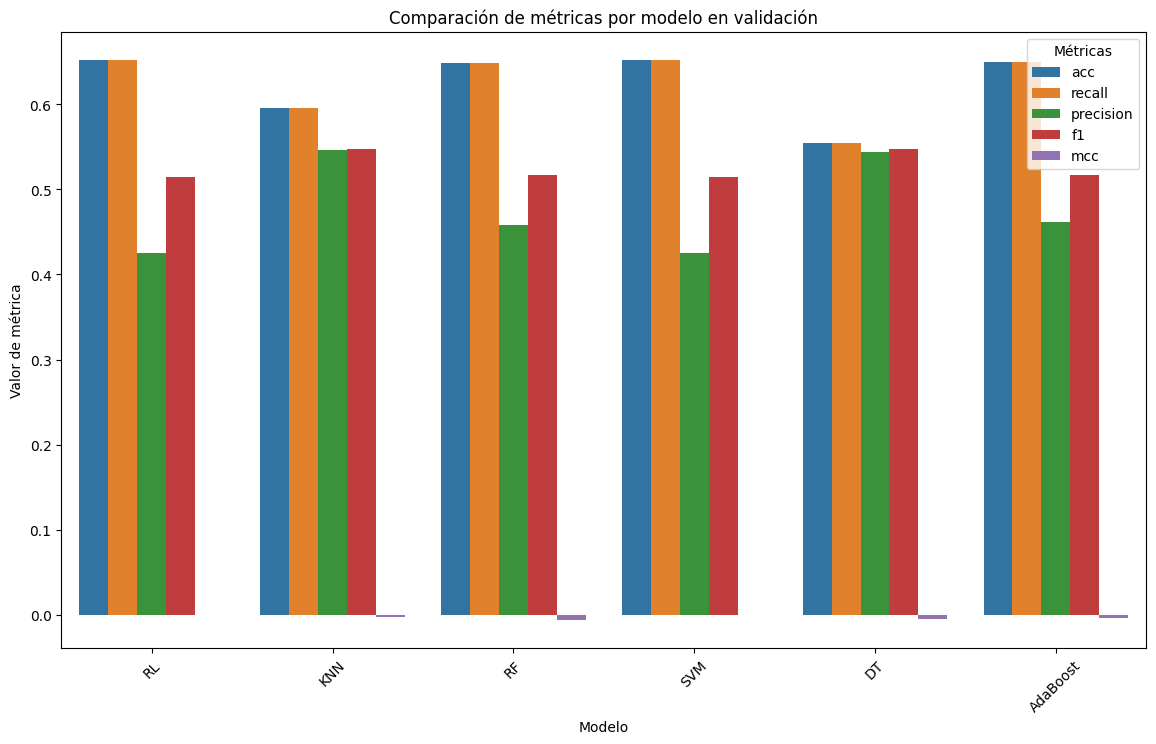

In [196]:
graph_models(df_val, "validación")

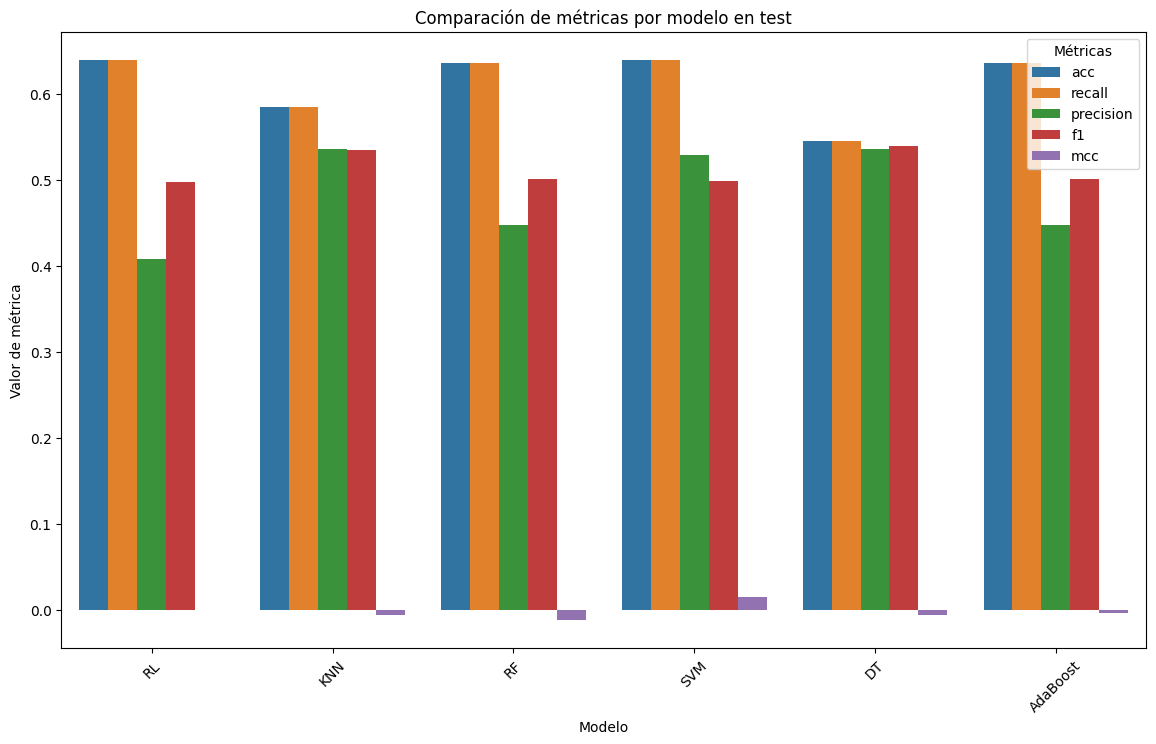

In [197]:
graph_models(df_test, "test")

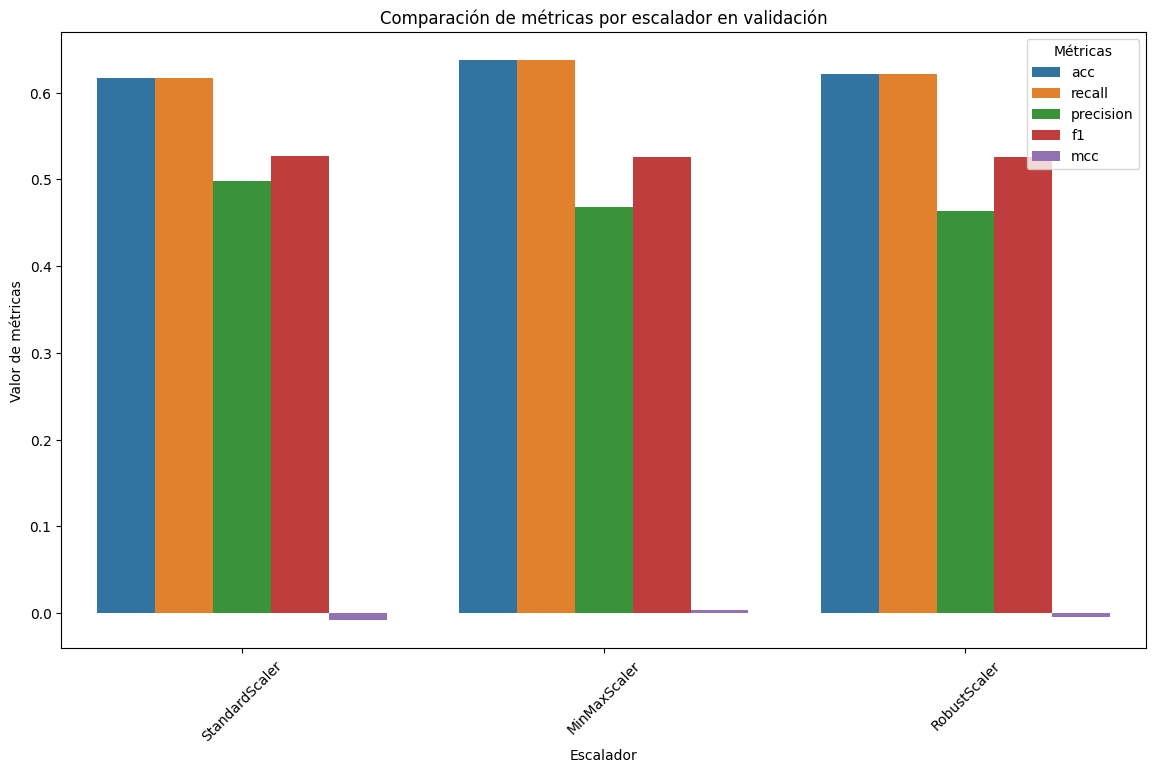

In [198]:
graph_scaler(df_val, "validación")

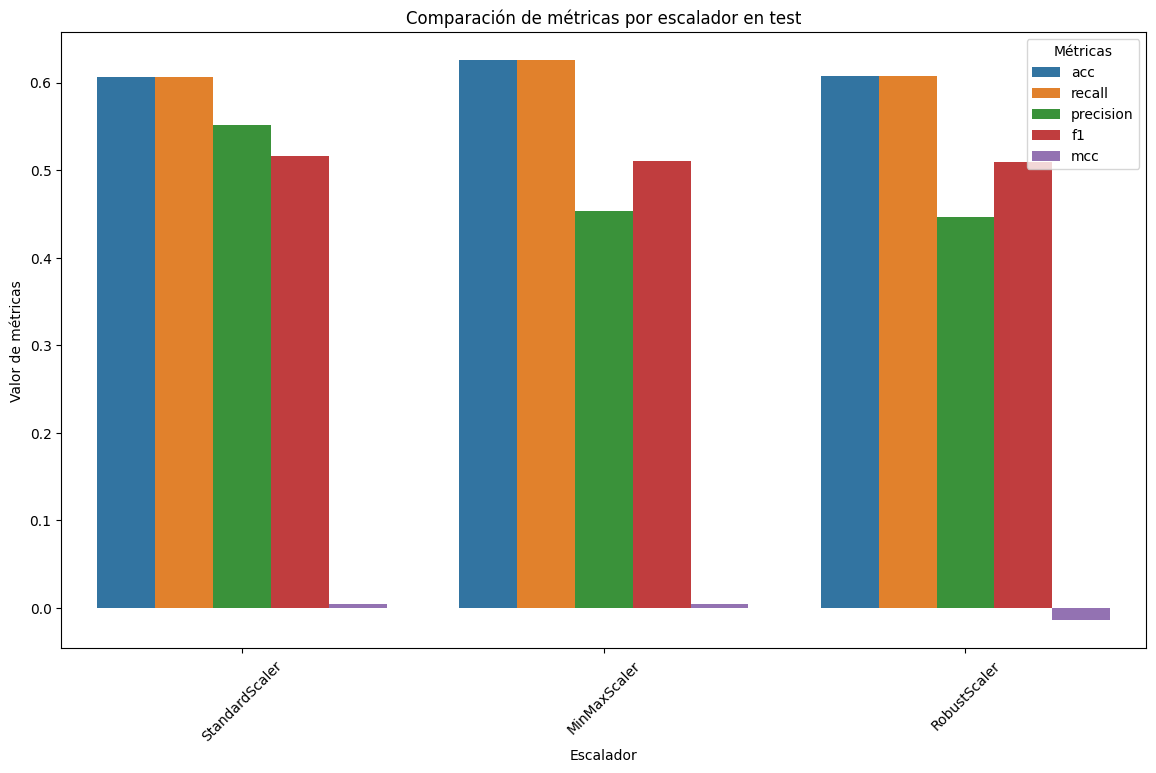

In [199]:
graph_scaler(df_test, "test")

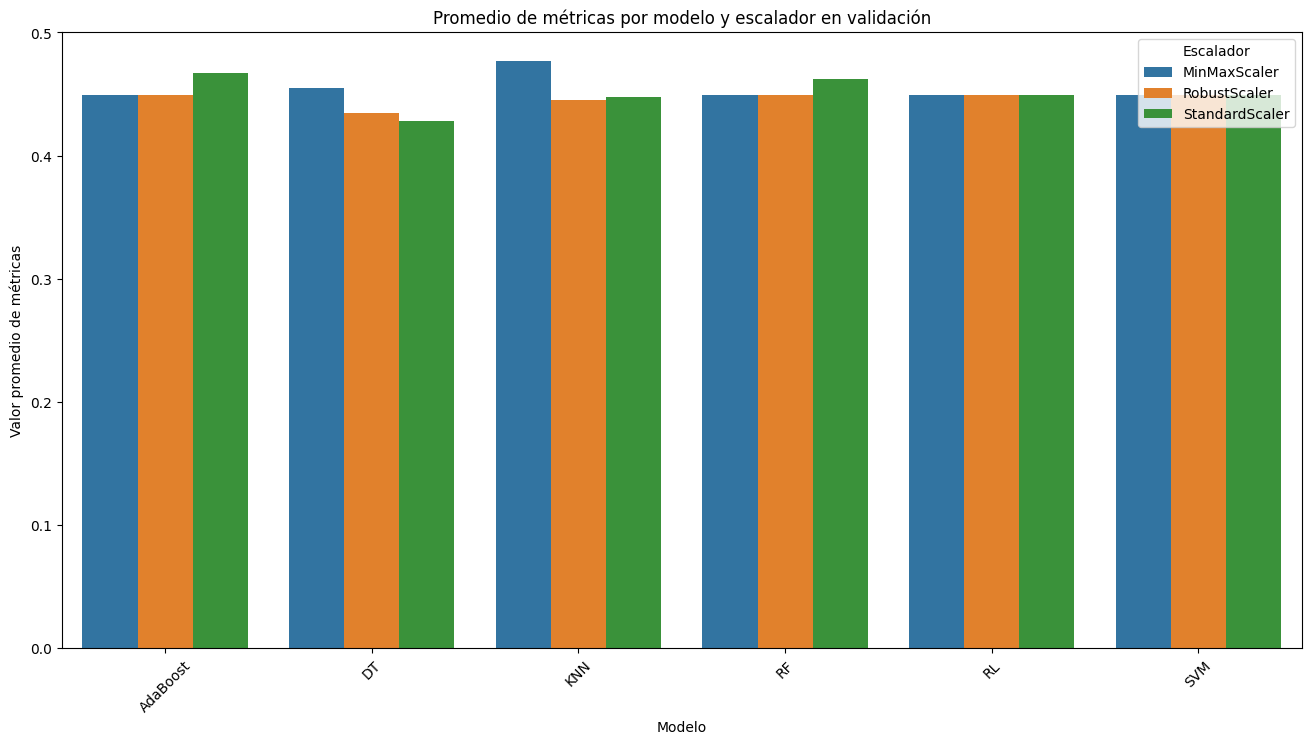

In [200]:
graph_models_scaler(df_val, "validación")

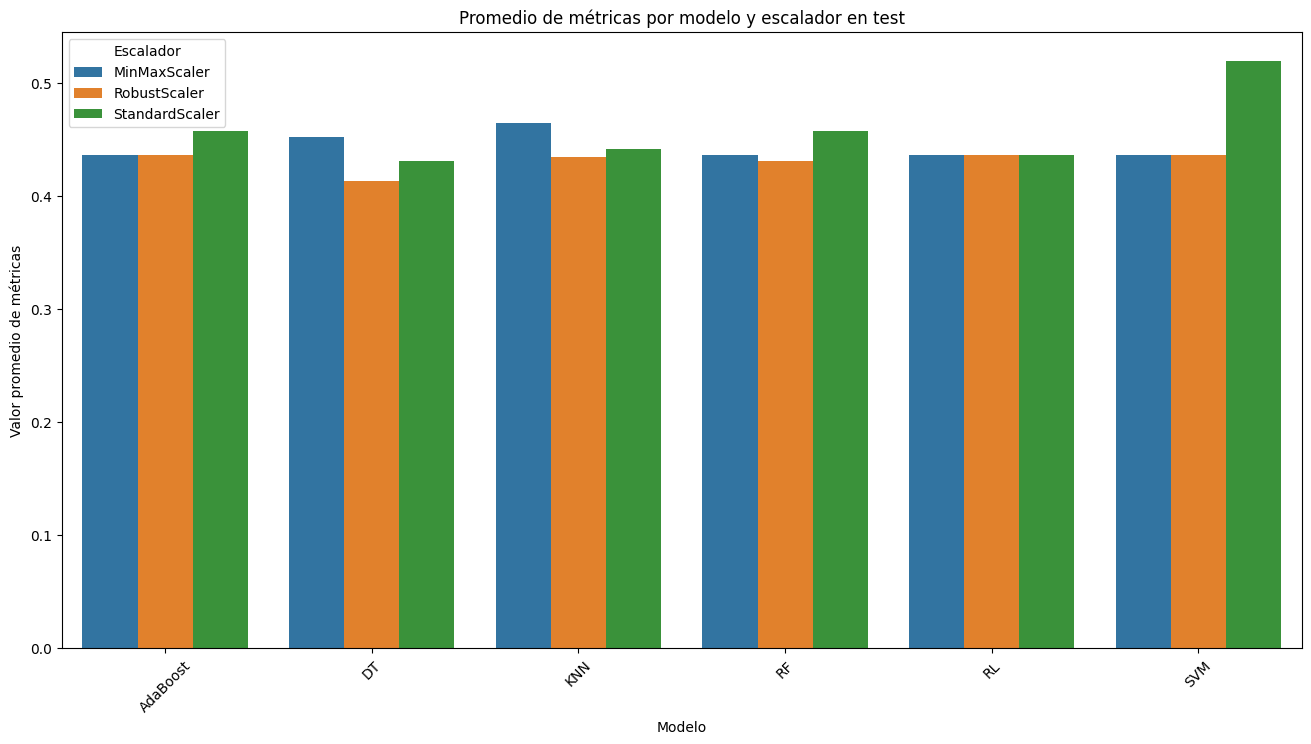

In [201]:
graph_models_scaler(df_test, "test")

In [202]:
best_models = pd.DataFrame()

for metric in metrics:
    best_index = df_result[metric].idxmax()
    best_model = df_result.loc[best_index]
    best_model['best_metric'] = metric
    best_models = best_models.append(best_model, ignore_index=True)

In [203]:
best_models

,dataset,scaler,model,acc,recall,precision,f1,mcc,cm,best_metric
0,Validation,StandardScaler,RL,0.652091,0.652091,0.425223,0.514769,0.000000,"[[1029, 0], [549, 0]]",acc
1,Validation,StandardScaler,RL,0.652091,0.652091,0.425223,0.514769,0.000000,"[[1029, 0], [549, 0]]",recall
2,Test,StandardScaler,SVM,0.639681,0.639681,0.769659,0.500299,0.044907,"[[560, 0], [316, 1]]",precision
3,Validation,MinMaxScaler,DT,0.577313,0.577313,0.550149,0.559398,0.008367,"[[767, 262], [405, 144]]",f1
4,Test,StandardScaler,SVM,0.639681,0.639681,0.769659,0.500299,0.044907,"[[560, 0], [316, 1]]",mcc
